In [1]:
library(readr) 
library(vars) 
library(ggplot2) 
library(RColorBrewer)
library(tidyr)
library(dplyr)

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Problema 4

In [2]:
AFP <- read.table('/home/lalo/Documentos/git/SeriesdeTiempo/Tarea 3 Series 2/AFP_returns.csv', header=TRUE ,sep=',') 


In [3]:
AFP

Date,Capital.A,Capital.B,Capital.C,Capital.D,Capital.E,Cuprum.A,Cuprum.B,Cuprum.C,Cuprum.D,⋯,ProVida.A,ProVida.B,ProVida.C,ProVida.D,ProVida.E,system.A,system.B,system.C,system.D,system.E
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2005-08,NA,NA,NA,NA,NA,-0.62,-0.56,-0.31,0.05,⋯,-0.60,-0.39,-0.26,0.14,0.77,-0.67,-0.47,-0.31,0.07,0.75
2005-09,NA,NA,NA,NA,NA,3.03,2.10,1.32,0.60,⋯,3.44,2.14,1.23,0.39,-0.55,3.21,2.17,1.22,0.49,-0.51
2005-10,NA,NA,NA,NA,NA,-4.17,-3.58,-3.09,-3.00,⋯,-4.49,-3.91,-3.38,-2.92,-2.75,-4.28,-3.72,-3.21,-2.85,-2.81
2005-11,NA,NA,NA,NA,NA,2.11,0.80,-0.14,-0.68,⋯,2.50,0.77,-0.24,-0.53,-0.79,2.23,0.84,-0.22,-0.54,-0.87
2005-12,NA,NA,NA,NA,NA,1.64,0.91,0.61,0.51,⋯,1.85,0.83,0.63,0.39,0.74,1.65,0.89,0.61,0.49,0.81
2006-01,NA,NA,NA,NA,NA,7.06,5.29,4.02,2.84,⋯,7.39,5.38,4.25,2.73,1.76,7.22,5.46,4.25,2.90,1.83
2006-02,NA,NA,NA,NA,NA,0.75,0.75,0.61,0.60,⋯,0.74,0.82,0.72,0.66,0.36,0.72,0.80,0.67,0.64,0.40
2006-03,NA,NA,NA,NA,NA,1.27,1.14,0.98,0.65,⋯,1.25,1.30,1.03,0.65,0.25,1.34,1.24,1.03,0.67,0.23
2006-04,NA,NA,NA,NA,NA,3.19,2.18,1.37,0.78,⋯,3.30,2.24,1.38,0.73,0.05,3.23,2.26,1.40,0.76,0.08


## A.

In [4]:
Fechas<-AFP$Date
Habitat<- AFP$Habitat.E
Cuprum<- AFP$Cuprum.E
ProVida<-AFP$ProVida.E
PlanVital<- AFP$PlanVital.E

In [5]:
AFP2 <- AFP%>%select(Habitat.E, Cuprum.E,ProVida.E,PlanVital.E)
ts<- ts(AFP2,freq=12,start=c(2005,1))

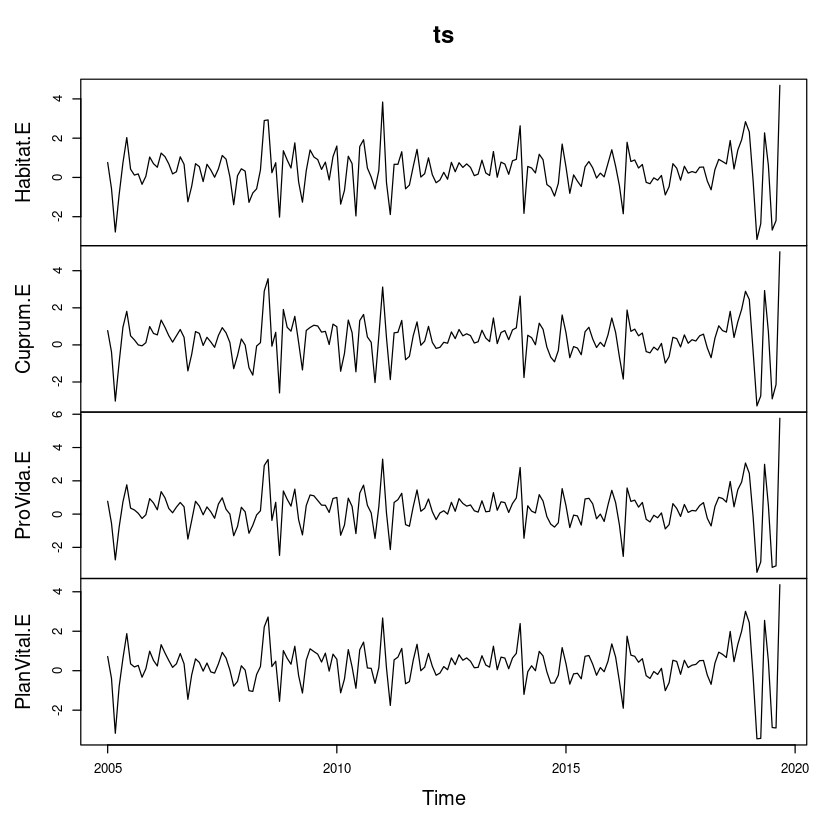

In [6]:
plot.ts(ts)

## B.

In [7]:
fit1<-VAR(AFP2, lag.max=10 , type = "const")
fit1$p

AIC(n) 
     2

In [8]:
VARselect(AFP2, lag.max=10,type='const')

,1,2,3,4,5,6,7,8,9,10
AIC(n),-9.514359e+00,-9.611835e+00,-9.525172e+00,-9.554024e+00,-9.577120e+00,-9.506002e+00,-9.459220e+00,-9.450470e+00,-9.398721e+00,-9.315999e+00
HQ(n),-9.362799e+00,-9.339027e+00,-9.131117e+00,-9.038721e+00,-8.940569e+00,-8.748203e+00,-8.580173e+00,-8.450174e+00,-8.277177e+00,-8.073208e+00
SC(n),-9.140947e+00,-8.939693e+00,-8.554300e+00,-8.284422e+00,-8.008788e+00,-7.638940e+00,-7.293428e+00,-6.985948e+00,-6.635469e+00,-6.254017e+00
FPE(n),7.378998e-05,6.695987e-05,7.308336e-05,7.111633e-05,6.966816e-05,7.508171e-05,7.908416e-05,8.032757e-05,8.534289e-05,9.373434e-05


Según los metodos conocidos deberiamos elegir al parametro 2.

## C.
Los parametros para el modelo p=2 seran los siguientes.

In [9]:
Acoef(fit1)

,Habitat.E.l1,Cuprum.E.l1,ProVida.E.l1,PlanVital.E.l1
Habitat.E,-0.19384255,0.5519093,-1.0907136,1.0724070
Cuprum.E,0.11920643,0.3542345,-1.0399425,0.9172522
ProVida.E,0.07155499,0.3865204,-1.0193384,0.9167510
PlanVital.E,-0.03659553,0.3644985,-0.8471205,0.8904630
,Habitat.E.l2,Cuprum.E.l2,ProVida.E.l2,PlanVital.E.l2
Habitat.E,-0.11933810,-0.5120392,-0.04960519,0.2576675
Cuprum.E,-0.08746887,-0.2515442,-0.19921328,0.0931993
ProVida.E,-0.05868134,-0.3524851,-0.25705614,0.2098962
PlanVital.E,0.02085905,-0.2527633,-0.30869112,0.1339373


In [10]:
summary(fit1) 


VAR Estimation Results:
Endogenous variables: Habitat.E, Cuprum.E, ProVida.E, PlanVital.E 
Deterministic variables: const 
Sample size: 175 
Log Likelihood: -120.374 
Roots of the characteristic polynomial:
0.6244 0.6244 0.4791 0.4538 0.4538 0.2453 0.2453 0.2257
Call:
VAR(y = AFP2, type = "const", lag.max = 10)


Estimation results for equation Habitat.E: 
Habitat.E = Habitat.E.l1 + Cuprum.E.l1 + ProVida.E.l1 + PlanVital.E.l1 + Habitat.E.l2 + Cuprum.E.l2 + ProVida.E.l2 + PlanVital.E.l2 + const 

               Estimate Std. Error t value Pr(>|t|)    
Habitat.E.l1   -0.19384    0.39038  -0.497   0.6202    
Cuprum.E.l1     0.55191    0.43832   1.259   0.2097    
ProVida.E.l1   -1.09071    0.50599  -2.156   0.0326 *  
PlanVital.E.l1  1.07241    0.43069   2.490   0.0138 *  
Habitat.E.l2   -0.11934    0.38907  -0.307   0.7594    
Cuprum.E.l2    -0.51204    0.46549  -1.100   0.2729    
ProVida.E.l2   -0.04961    0.52398  -0.095   0.9247    
PlanVital.E.l2  0.25767    0.42488   0.606   0.545

Segun esto podemos decir que el PlanVital.E.l1 es el significativo para todas las predicciones, seguido por el ProVida.E.l1.

## D.

In [11]:
summary(fit1)$roots

[1] 0.6243780 0.6243780 0.4790977 0.4538362 0.4538362 0.2452610 0.2452610
[8] 0.2257010

Dados estos datos podemos ve que todas las raices pertenecen al disco unitario, por lo que el proceso no seria estable.

## E.

In [12]:
nts<-window(ts,start=start(ts),end=c(2019,5))
fit2<-VAR(nts, lag.max=10 , type = "const")
fit2$p

AIC(n) 
     2

In [13]:
dato_oculto<-window(ts,start=c(2019,6),end=end(ts))
do<-data.frame(dato_oculto)
do

Habitat.E,Cuprum.E,ProVida.E,PlanVital.E
<dbl>,<dbl>,<dbl>,<dbl>
0.61,0.70,0.51,0.48
-2.68,-2.91,-3.20,-2.88
-2.20,-2.14,-3.11,-2.90
4.69,5.02,5.76,4.36


In [14]:
do$Cuprum[3]**2

[1] 4.5796

In [15]:
predict(fit2,n.ahead=4,ci=0.95)

$Habitat.E
              fcst      lower    upper       CI
[1,]  2.2899152385  0.4634901 4.116340 1.826425
[2,]  0.5427038031 -1.4074892 2.492897 1.950193
[3,] -0.3479989949 -2.3667039 1.670706 2.018705
[4,]  0.0008746469 -2.0505136 2.052263 2.051388

$Cuprum.E
            fcst      lower    upper       CI
[1,]  2.28223949  0.3569068 4.207572 1.925333
[2,]  0.50525950 -1.5298357 2.540355 2.035095
[3,] -0.42387767 -2.5200120 1.672257 2.096134
[4,] -0.02818881 -2.1597118 2.103334 2.131523

$ProVida.E
            fcst      lower    upper       CI
[1,]  2.25520095  0.3586382 4.151764 1.896563
[2,]  0.45223432 -1.5576695 2.462138 2.009904
[3,] -0.42628429 -2.5052254 1.652657 2.078941
[4,] -0.04810073 -2.1621555 2.065954 2.114055

$PlanVital.E
            fcst     lower    upper       CI
[1,]  2.40981243  0.704488 4.115137 1.705324
[2,]  0.43711828 -1.402924 2.277160 1.840042
[3,] -0.42409473 -2.315991 1.467802 1.891896
[4,] -0.06732635 -1.996983 1.862330 1.929656


In [16]:
temp=c()

for (j in c(1,2,3,4)){
    temp=c(temp,(predict(fit2,n.ahead=4,ci=0.95)$fcst$Habitat.E[j]-do$Habitat.E[j])**2)}
error_cuad_med_Habitat.e<-sum(temp)/4

In [17]:
temp=c()

for (j in c(1,2,3,4)){
    temp=c(temp,(predict(fit2,n.ahead=4,ci=0.95)$fcst$Cuprum.E[j]-do$Cuprum.E[j])**2)}
error_cuad_med_Cuprum.e<-sum(temp)/4

In [18]:
temp=c()

for (j in c(1,2,3,4)){
    temp=c(temp,(predict(fit2,n.ahead=4,ci=0.95)$fcst$ProVida.E[j]-do$ProVida.E[j])**2)}
error_cuad_med_ProVida.e<-sum(temp)/4

In [19]:
temp=c()

for (j in c(1,2,3,4)){
    temp=c(temp,(predict(fit2,n.ahead=4,ci=0.95)$fcst$PlanVital.E[j]-do$PlanVital.E[j])**2)}
error_cuad_med_PlanVital.e<-sum(temp)/4

In [20]:
error_cuad_med_Habitat.e
error_cuad_med_Cuprum.e
error_cuad_med_ProVida.e
error_cuad_med_PlanVital.e

[1] 9.656435

[1] 10.64919

[1] 14.33023

[1] 10.11469

In [21]:
predict(fit2,n.ahead=4,ci=0.95)$fcst$Habitat.E

fcst,lower,upper,CI
2.2899152385,0.4634901,4.116340,1.826425
0.5427038031,-1.4074892,2.492897,1.950193
-0.3479989949,-2.3667039,1.670706,2.018705
0.0008746469,-2.0505136,2.052263,2.051388


Vemos que AFP Habitat es la que tiene el menor error cuadratico medio por lo que es el que mejor ajuste.

## F.

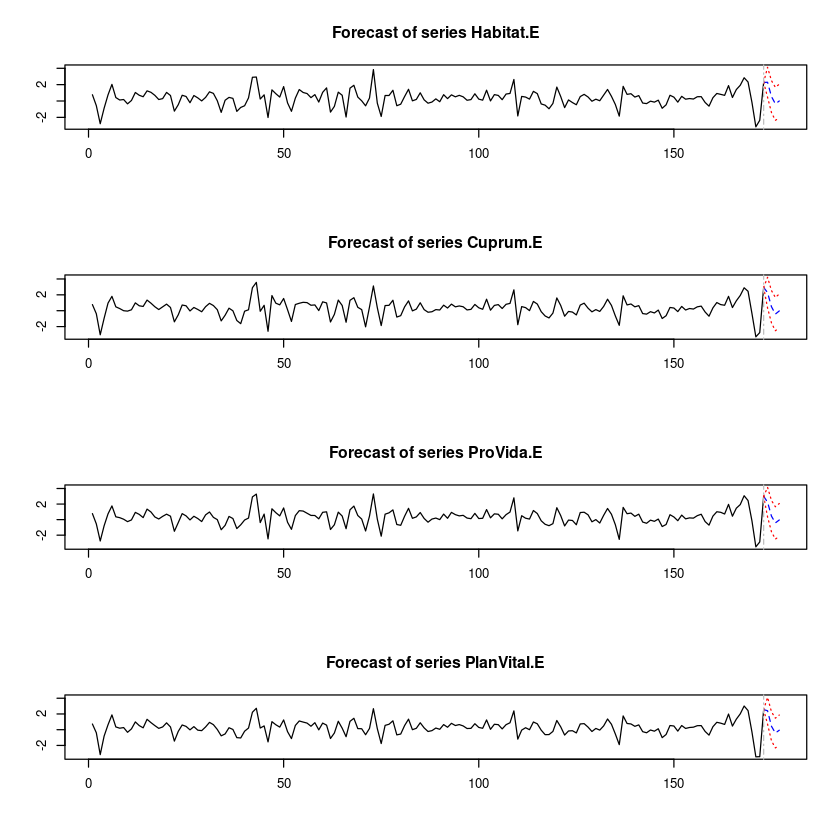

In [22]:
plot(predict(fit2,n.ahead=4,ci=0.95)) 

## G.

In [23]:
normality.test(fit2)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 637.4, df = 8, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 64.276, df = 4, p-value = 3.656e-13


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 573.12, df = 4, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 637.4, df = 8, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 64.276, df = 4, p-value = 3.656e-13


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object fit2
Chi-squared = 573.12, df = 4, p-value < 2.2e-16




Dado los valores p podemos decir que los residuos siguen una distribución normal bastante bien.